# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #print(json.dumps(city_url, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
 # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ambarakaraka
City not found. Skipping...
Processing Record 4 of Set 1 | santa cruz
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | acarau
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | al kharijah
Processing Record 18 of Set 1 | paka
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | mili
Processing Record 21 of Set 1 | hadibu
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.90,74,96,0.98,NZ,1702069349
1,santa cruz,-17.8000,-63.1667,28.03,65,75,7.20,BO,1702069211
2,sitka,57.0531,-135.3300,4.94,81,100,8.75,US,1702069351
3,edinburgh of the seven seas,-37.0676,-12.3116,15.81,89,100,14.07,SH,1702069351
4,enewetak,11.3474,162.3373,27.44,78,92,10.04,MH,1702069351


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,74,96,0.98,NZ,1702069349
1,santa cruz,-17.8000,-63.1667,28.03,65,75,7.20,BO,1702069211
2,sitka,57.0531,-135.3300,4.94,81,100,8.75,US,1702069351
3,edinburgh of the seven seas,-37.0676,-12.3116,15.81,89,100,14.07,SH,1702069351
4,enewetak,11.3474,162.3373,27.44,78,92,10.04,MH,1702069351


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

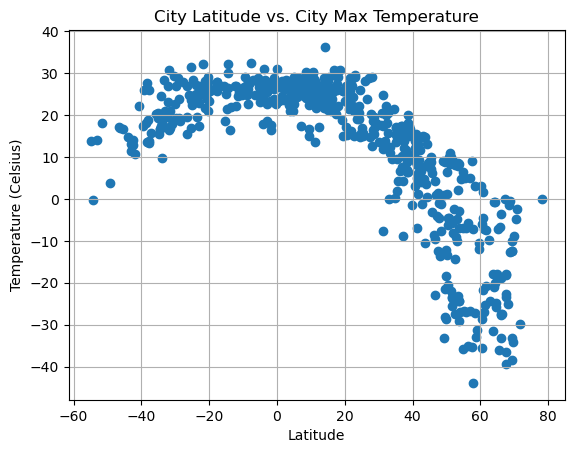

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. City Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

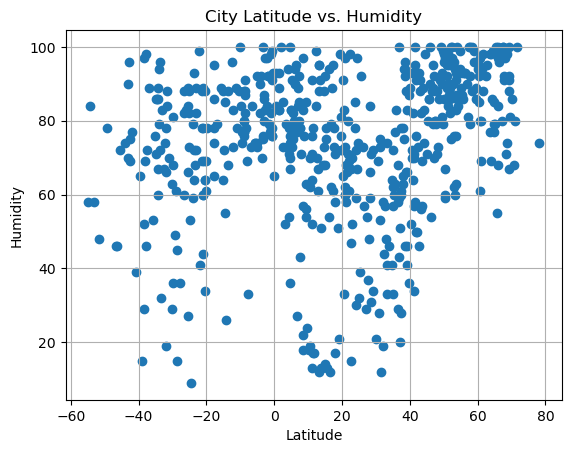

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

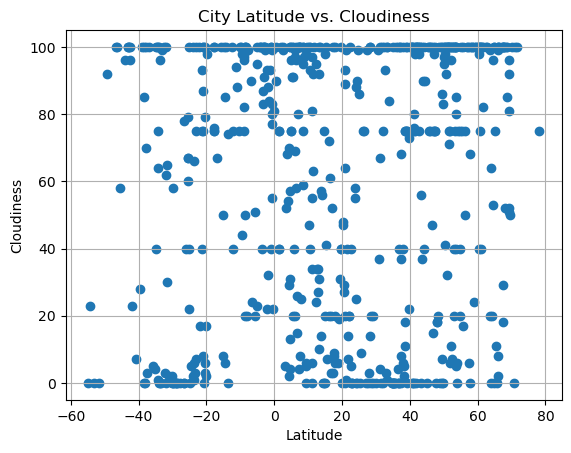

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

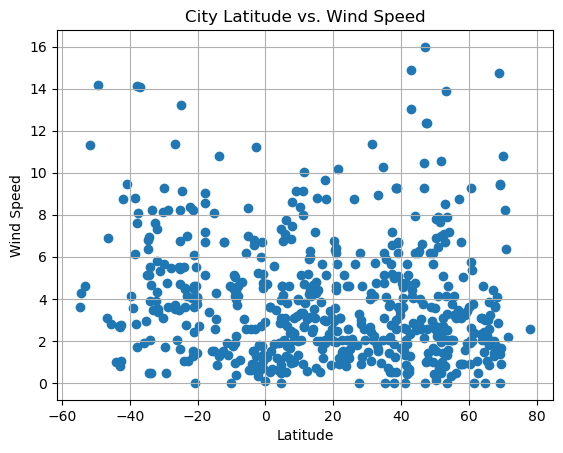

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:0.4983491268232268


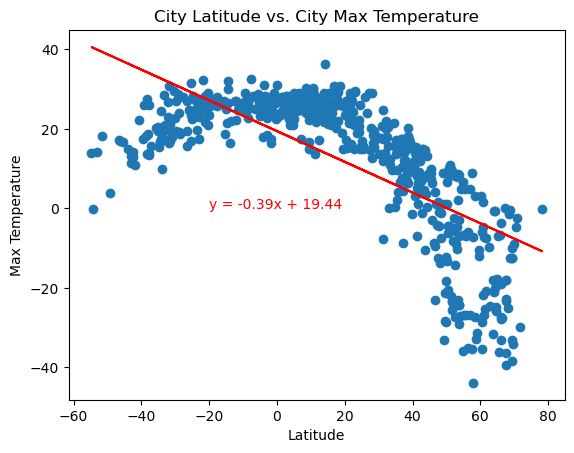

In [26]:
# Define a function to create Linear Regression plots
#Latitude Vs Max Temperature 
#Define Values
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0),color="red")
plt.title("City Latitude vs. City Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.045480765709715223


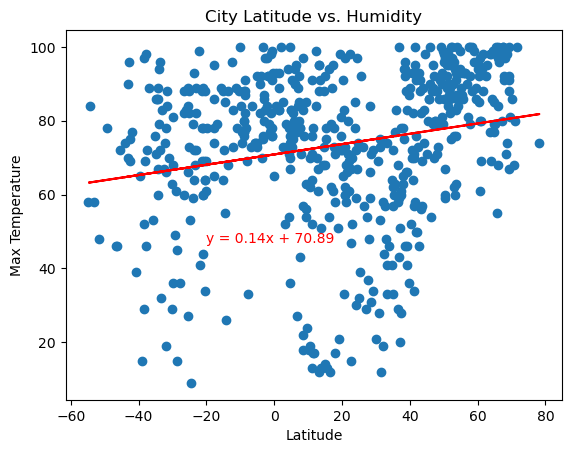

In [25]:
# Define a function to create Linear Regression plots
#latitude vs. humidity
#Define Values
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,47),color="red")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.010072688396180567


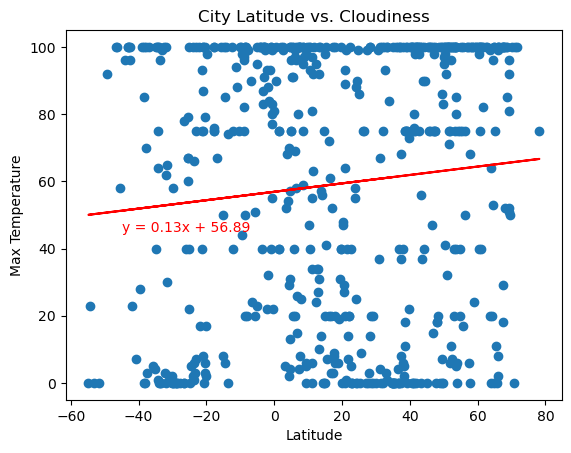

In [30]:
# Define a function to create Linear Regression plots
#latitude vs. cloudiness
#Define Values
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,45),color="red")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.01476801273575851


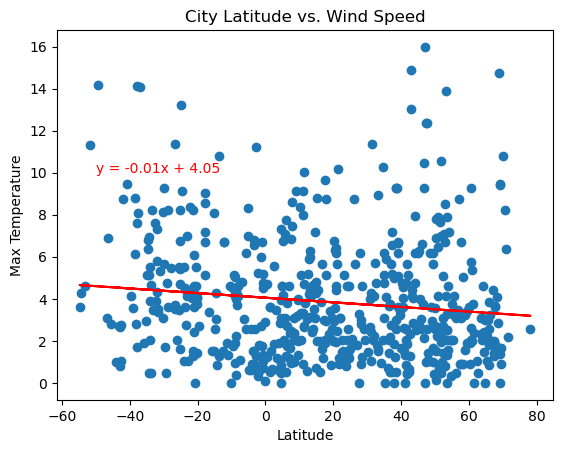

In [36]:
# Define a function to create Linear Regression plots
#latitude vs. Wind Speed
#Define Values
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50, 10), color="red")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue**2}")
plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sitka,57.0531,-135.3300,4.94,81,100,8.75,US,1702069351
4,enewetak,11.3474,162.3373,27.44,78,92,10.04,MH,1702069351
5,aasiaat,68.7098,-52.8699,-12.59,98,85,2.83,GL,1702069351
8,bethel,41.3712,-73.4140,8.05,57,75,2.57,US,1702069353
10,utrik,11.2278,169.8474,26.99,76,55,9.11,MH,1702069353


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,74,96,0.98,NZ,1702069349
1,santa cruz,-17.8000,-63.1667,28.03,65,75,7.20,BO,1702069211
3,edinburgh of the seven seas,-37.0676,-12.3116,15.81,89,100,14.07,SH,1702069351
6,port-aux-francais,-49.3500,70.2167,3.85,78,92,14.15,TF,1702069352
7,ushuaia,-54.8000,-68.3000,13.81,58,0,3.60,AR,1702069198


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.7241684863349744


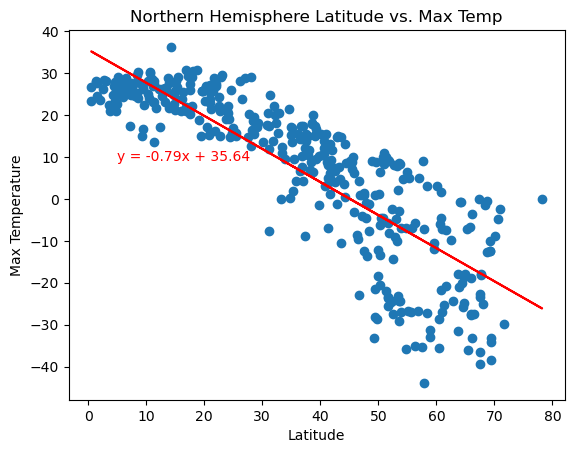

In [43]:
# Linear regression on Northern Hemisphere
#latitude vs. Max Temp
#Define Values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5, 9), color="red")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.3931461338948771


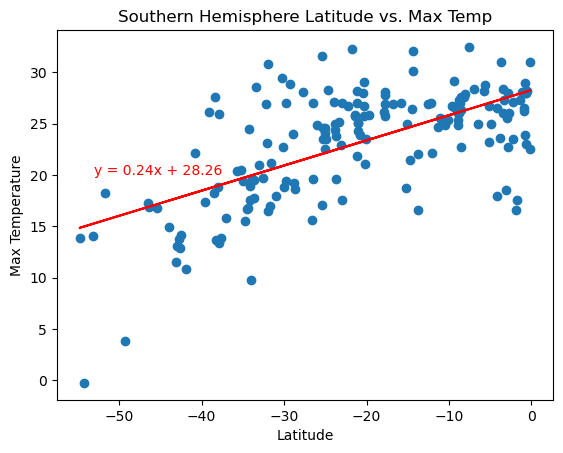

In [47]:
# Linear regression on Southern Hemisphere
#latitude vs. Max Temp
#Define Values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-53, 20), color="red")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
As the latitude increases in the Northern Hemisphere, the Max Temperature decreases. The r value of .72 for the northern hemisphere indicates a moderately strong relationship between latitude and temperature. The inverse trend occurs within the Southern Hemisphere, as latitude increases, the Max temperature for that region increases. The r value of .39 for the southern hemisphere indicates a a slightly less strong yet moderate relationship between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.12282662113304696


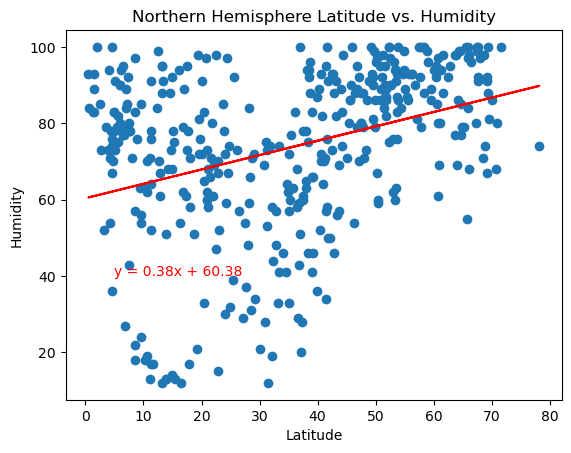

In [52]:
# Linear regression on Northern Hemisphere
#latitude vs. Humidity
#Define Values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5, 40), color="red")
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.1088043381420497


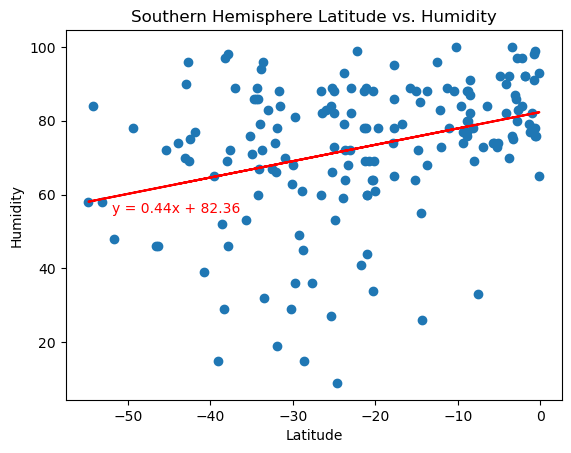

In [55]:
# Linear regression on Southern Hemisphere
#latitude vs. Humidity
#Define Values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-52, 55), color="red")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** As the latitude increases in the Northern Hemisphere, the Humidity increases. The r value of .12 for the northern hemisphere indicates a slight correlation between latitude and humitidy. Similairly, in the Southern Hemisphere, as latitude increases, the humidity increases. The r value of .10 for the southern hemisphere indicates a slight correlation between latitude and temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.024013929098659185


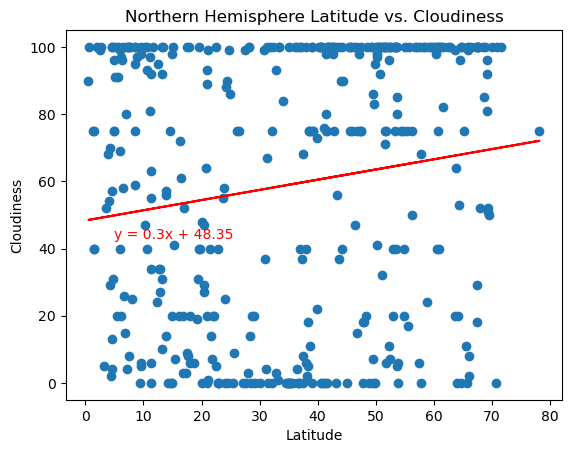

In [58]:
# Northern Hemisphere
#latitude vs. Cloudiness
#Define Values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5, 43), color="red")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.07187076062547378


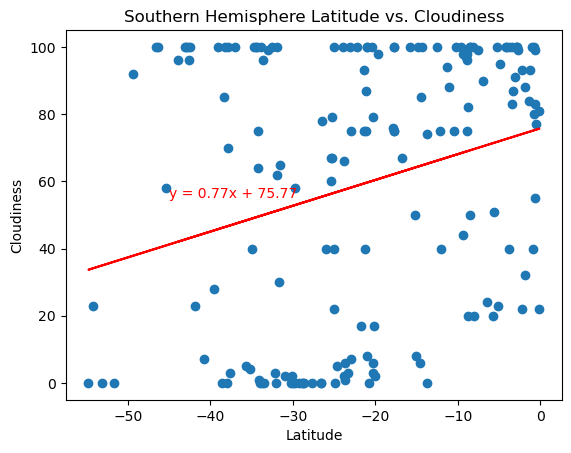

In [60]:
# Southern Hemisphere
#latitude vs. Cloudiness
#Define Values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-45, 55), color="red")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** As the latitude increases in the Northern Hemisphere, the Cloudiness increases. The r value of .02 for the northern hemisphere indicates a small positive correlation between latitude and Cloudiness. Similairly, in the Southern Hemisphere, as latitude increases, the Cloudiness increases. The r value of .07 for the southern hemisphere indicates a small positive correlation between latitude and Cloudiness. Both of these correlations are marginal and do not indicate strong correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.0011138711800997292


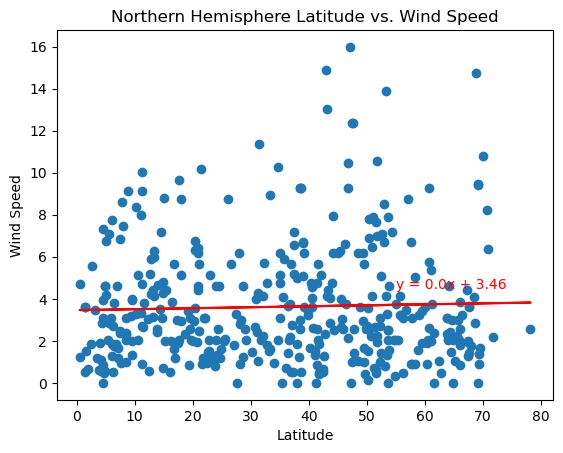

In [64]:
# Northern Hemisphere
#latitude vs. Wind Speed
#Define Values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (55, 4.5), color="red")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.07498513589380366


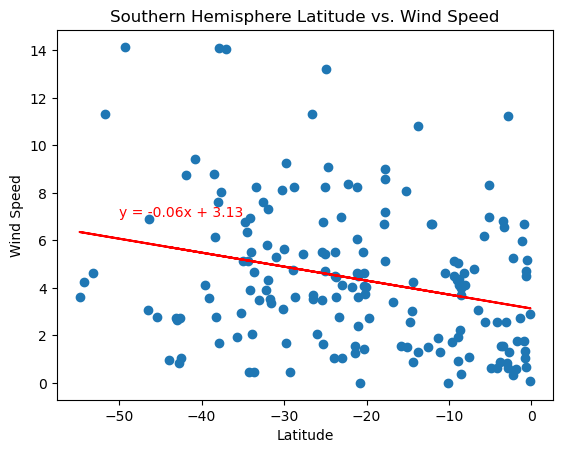

In [67]:
# Southern Hemisphere
#latitude vs. Wind Speed
#Define Values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50, 7), color="red")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** As the latitude increases in the Northern Hemisphere, the Wind Speed has little to no change. The r value of .001 for the northern hemisphere indicates a relatively no correlation between latitude and wind speed. In the Southern Hemisphere, as latitude increases, the Wind Speed decreases. The r value of .07 for the southern hemisphere indicates a small correlation between latitude and Cloudiness. 